# This notebook explores the PGAIML Kaggle dataset 

[Kaggle Dataset Source](https://www.kaggle.com/code/chandasaisanthosh/bank-churn-prediction-using-neural-network)


### Notebook details
In this notebook, I perform some data cleaning and initial analysis before switching to the EDA notebook.


## Load Modules

In [85]:
import os

from dotenv import load_dotenv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Grab Environment Variables 

In [86]:

# Load environment variables from .env
load_dotenv()

True

In [87]:
# Get RAW csv data
RAW_DATA_PATH = os.environ.get("RAW_DATA_PATH")

## Load the Raw Dataset into Pandas DataFame 

In [88]:
df = pd.read_csv(RAW_DATA_PATH)

--

## Examining the Data

* df.shape
    * number of rows: 10000
    * number of columns: 14

* df.head(5) #brief glimpse of the dataframe
    - I observe that the columns (df.columns)include:
        ```
        ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']
        ```

    - I rename the columns to be fit more of the Pythonic way of naming variables and to put it all in lower case
        ```
        'row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products',
       'has_credit_card', 'is_active_member', 'estimated_salary', 'exited']
       ```

In [89]:
df.shape

(10000, 14)

In [90]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [91]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [92]:
df = df.rename(columns = {
    "RowNumber": "row_number", 
    "CustomerId": "customer_id", 
    "Surname": "surname", 
    "CreditScore": "credit_score", 
    "Geography": "geography",
    "Gender": "gender", 
    "Age": "age", 
    "Tenure": "tenure", 
    "Balance": "balance", 
    "NumOfProducts": "num_of_products", 
    "HasCrCard": "has_credit_card",
    "IsActiveMember": "is_active_member", 
    "EstimatedSalary": "estimated_salary",
    "Exited": "exited"
})

In [93]:
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products',
       'has_credit_card', 'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

### Checking for Missing Values

* no missing values so that is good. 

In [94]:
df.isnull().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_credit_card     0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

### Checking for Duplicate Rows

**Result**

* There are no duplicate rows.


Notice, even if we remove the unique `customer_id` there are still no duplicate records found.


In [95]:
df.duplicated().sum()

np.int64(0)

### Checking Data Types

```
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_credit_card   10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64
```

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_credit_card   10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [97]:
# Get Numerical Columns
numeric_cols = df.select_dtypes(include="number").columns
print(numeric_cols)

Index(['row_number', 'customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'num_of_products', 'has_credit_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')


In [98]:
# Get Categorical Columns
categorical_cols = df.select_dtypes(include="object").columns
print(categorical_cols)

Index(['surname', 'geography', 'gender'], dtype='object')


### Check the Number of Unique Values for Each Feature

```
row_number          10000
customer_id         10000
surname              2932
credit_score          460
geography               3
gender                  2
age                    70
tenure                 11
balance              6382
num_of_products         4
has_credit_card         2
is_active_member        2
estimated_salary     9999
exited                  2
```

#### Get the Categorical Feature Count Information

* df["surname"].value_counts()

* df["geography"].value_counts()

* df["gender"].value_counts()


#### Get the Feature Counts for Exits, Is_Active_Member
* df["exited"].value_counts()
* df["is_active_member"].value_counts()


### The value Counts Show the data imbalances
* "Surnames" - There is a Long Right Tail of data which is probably to be expected

* "Geography" - France has much more data than Germany and Spain

* "Gender" - There are more men then women. 

* "exited" - This is the most important imbalance ~80% Stay and ~20% Left

    ```
    exited
    0    7963 - Customers Did Not Leave - Stayed
    1    2037 - Customers Leave - Left
    ```

* "is_active_member" - There is little imbalance here

    ```
    is_active_member
    1    5151
    0    4849
    ```

* "has_credit_card" - There is a definite imbalance

    ```
    has_credit_card
    1    7055 - Has a credit card with the bank
    0    2945 - Does not have a credit card with the bank

    ```

In [99]:
df.nunique()

row_number          10000
customer_id         10000
surname              2932
credit_score          460
geography               3
gender                  2
age                    70
tenure                 11
balance              6382
num_of_products         4
has_credit_card         2
is_active_member        2
estimated_salary     9999
exited                  2
dtype: int64

In [100]:
df["surname"].value_counts()

surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

Looking at the Top surnames, we see there are potentially a large number of families banking together. This observation might be important bcause if some family members churn, then other other family members may also churn. 

In [101]:
df["geography"].value_counts()

geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [102]:
df["gender"].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [103]:
df["exited"].value_counts()

exited
0    7963
1    2037
Name: count, dtype: int64

In [104]:
df["exited"].value_counts(normalize=True)

exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

<Axes: xlabel='exited'>

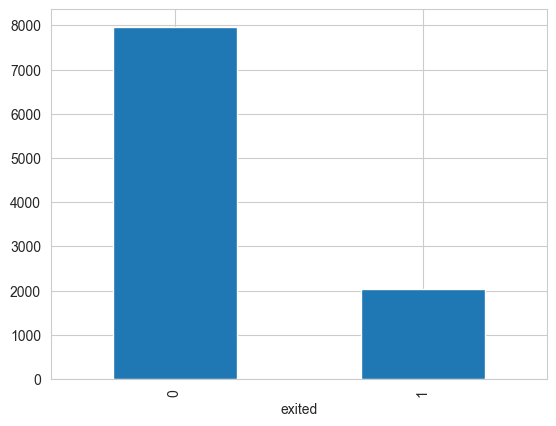

In [105]:
df["exited"].value_counts().plot(kind="bar")

In [106]:
df["is_active_member"].value_counts()

is_active_member
1    5151
0    4849
Name: count, dtype: int64

In [107]:
df["has_credit_card"].value_counts()

has_credit_card
1    7055
0    2945
Name: count, dtype: int64

## Getting Statistical Measure of the Numeric Data



In [108]:
df.describe()

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [109]:
# Transpose the data for better visualization
df.describe(exclude="object").map(lambda x: f"{x:0.3f}").T


,count,mean,std,min,25%,50%,75%,max
row_number,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
customer_id,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
credit_score,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
num_of_products,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
has_credit_card,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
is_active_member,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
estimated_salary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


--

## Checking for Outliers

Here, I want to visualize the distributions to identify outliers and better understand each numerical features values in case I need to perform some clipping/filtering of values

**Result**: 

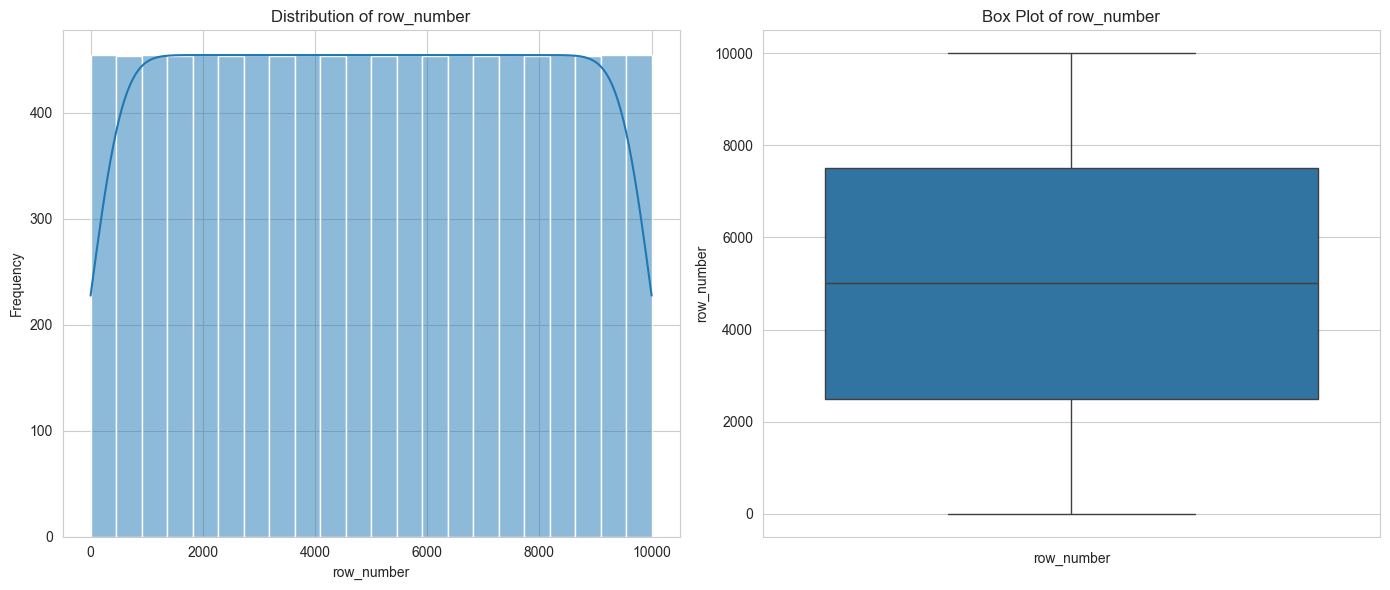

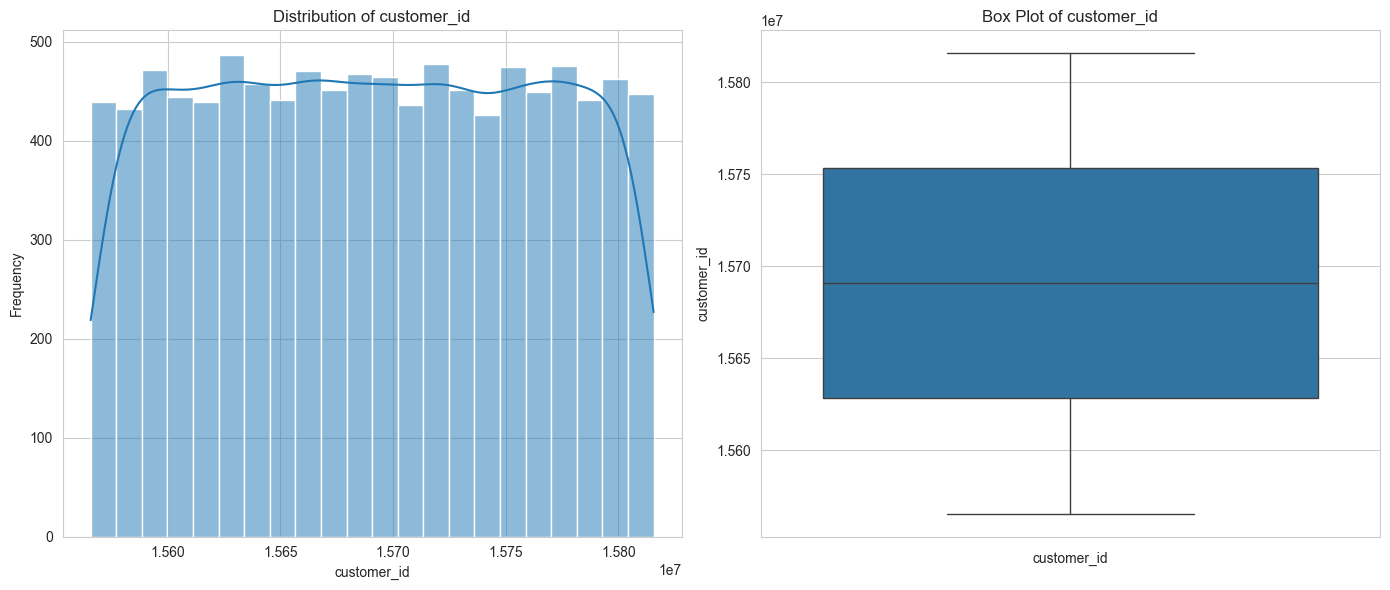

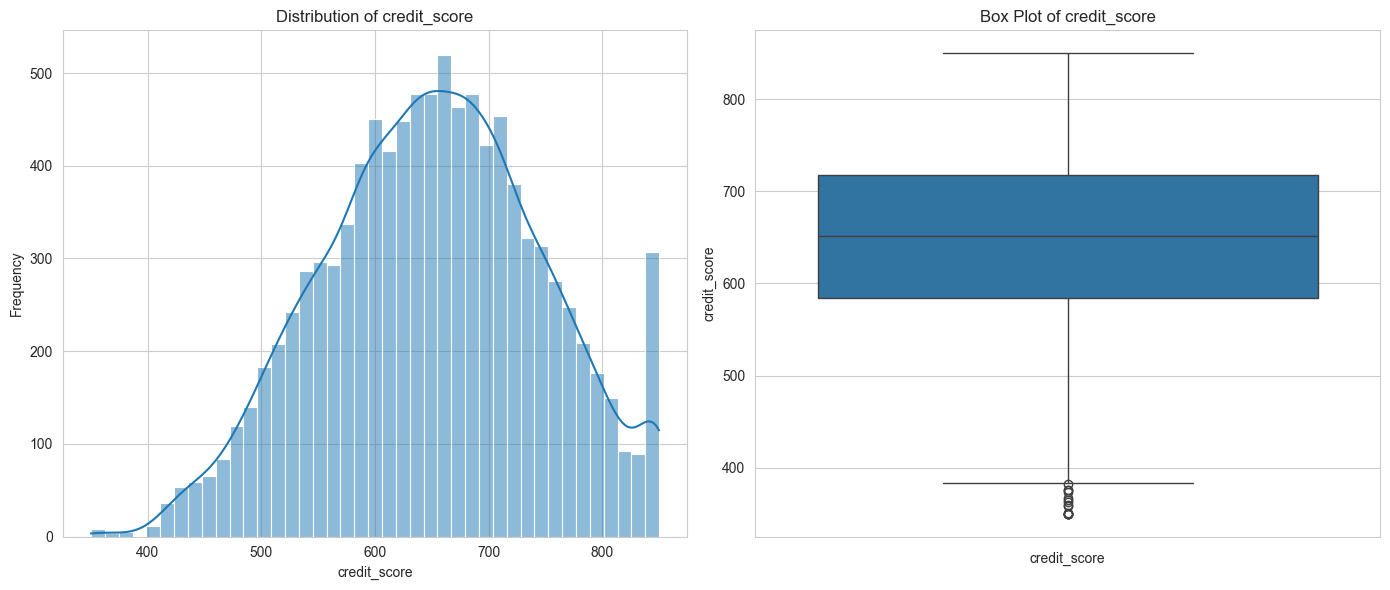

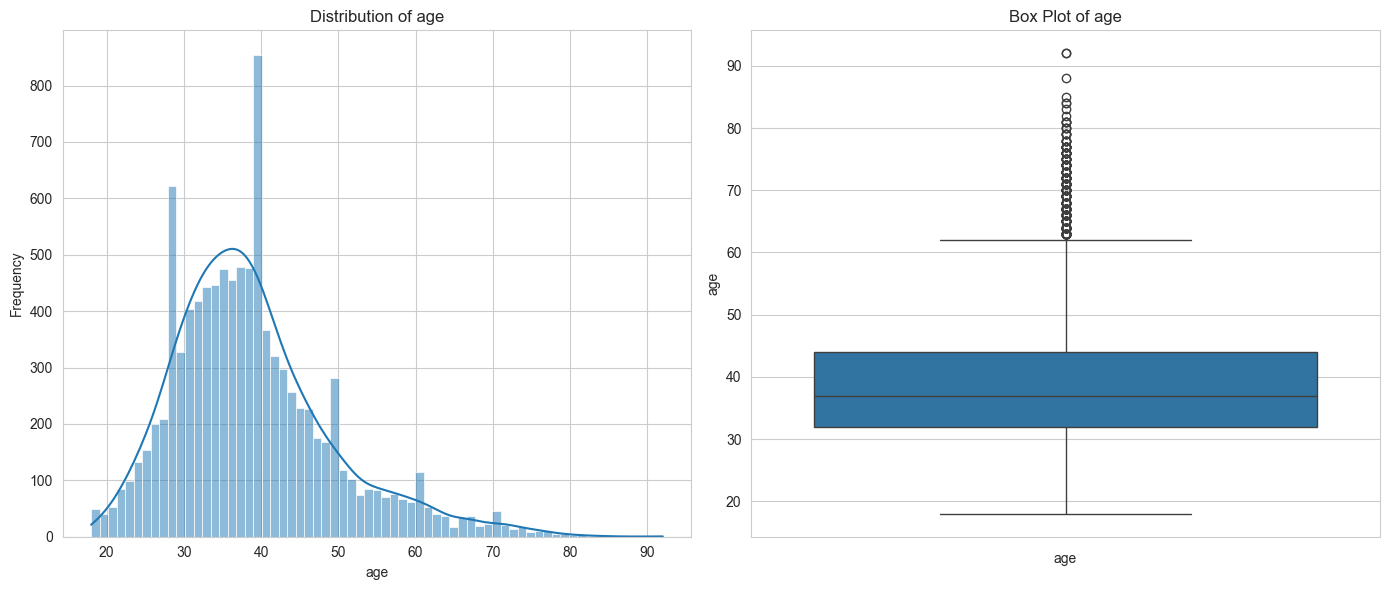

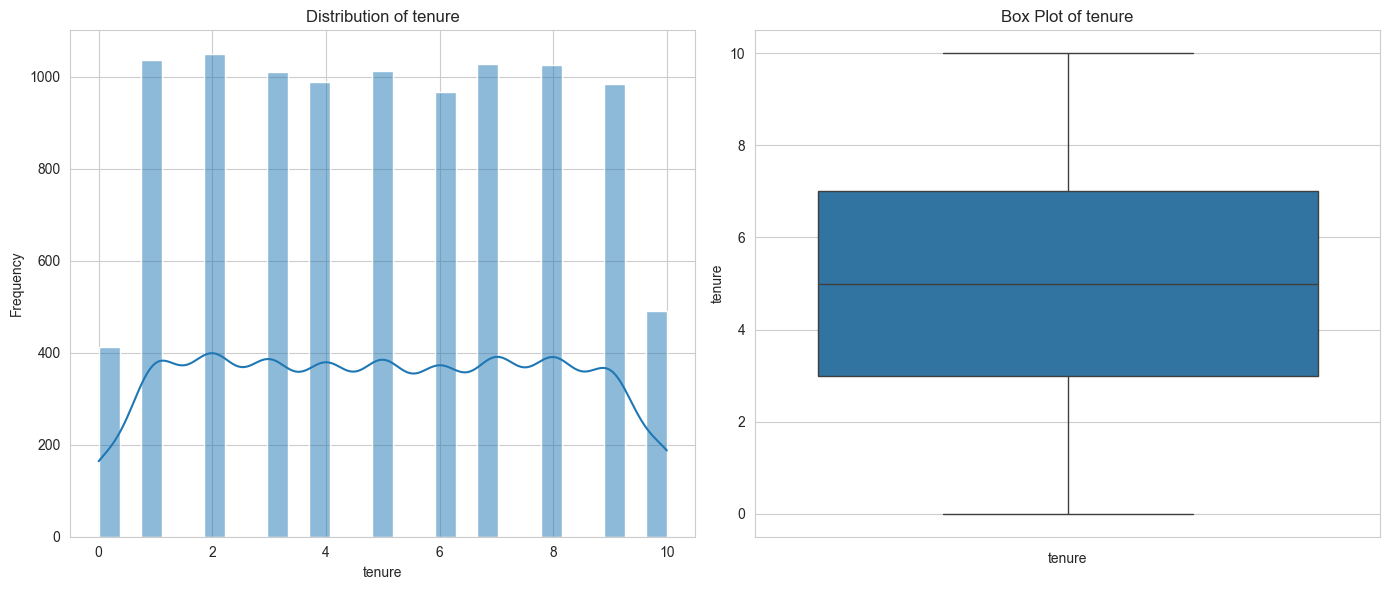

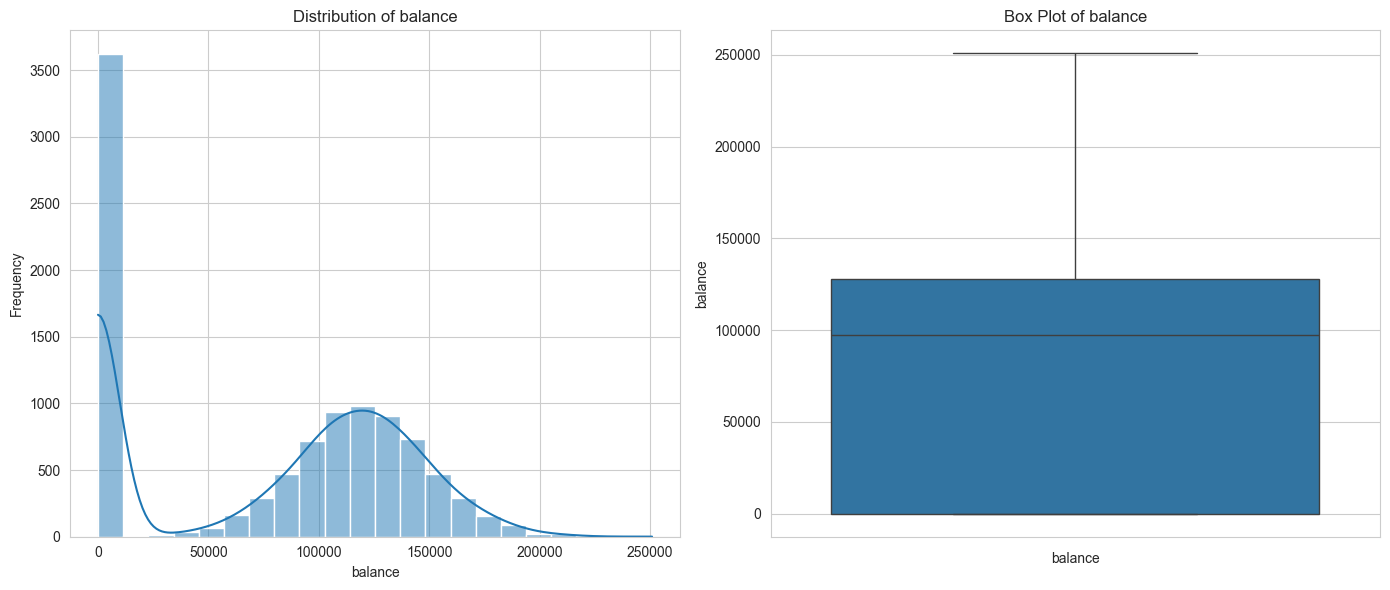

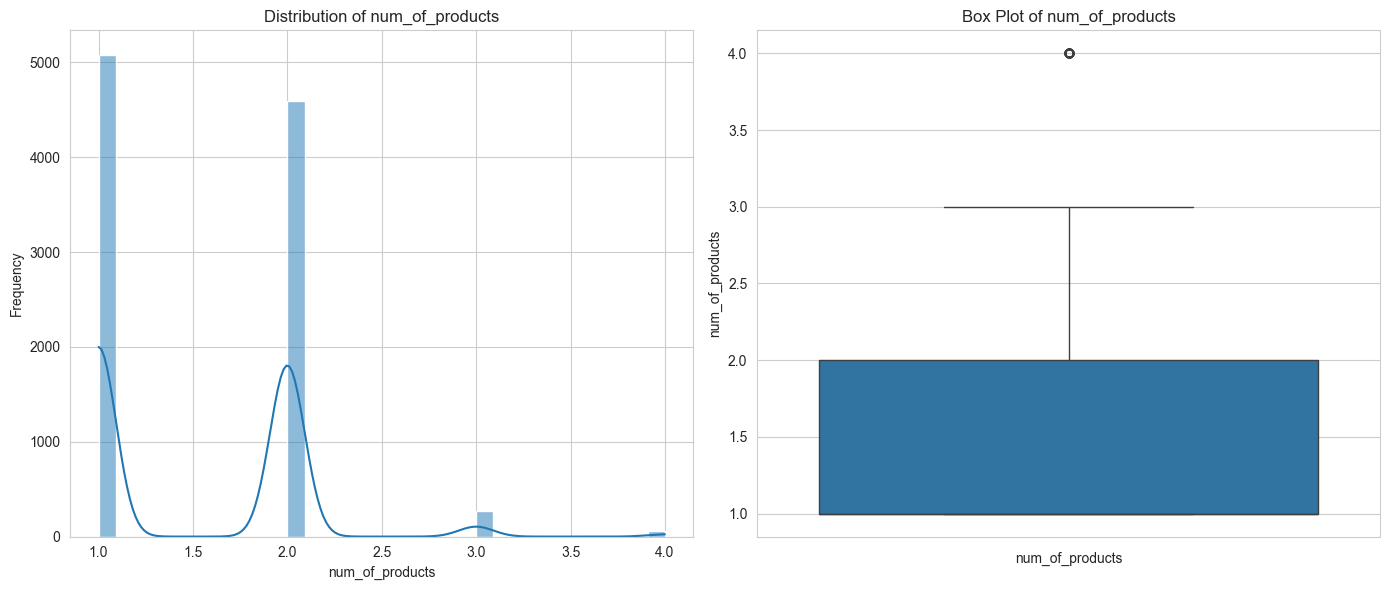

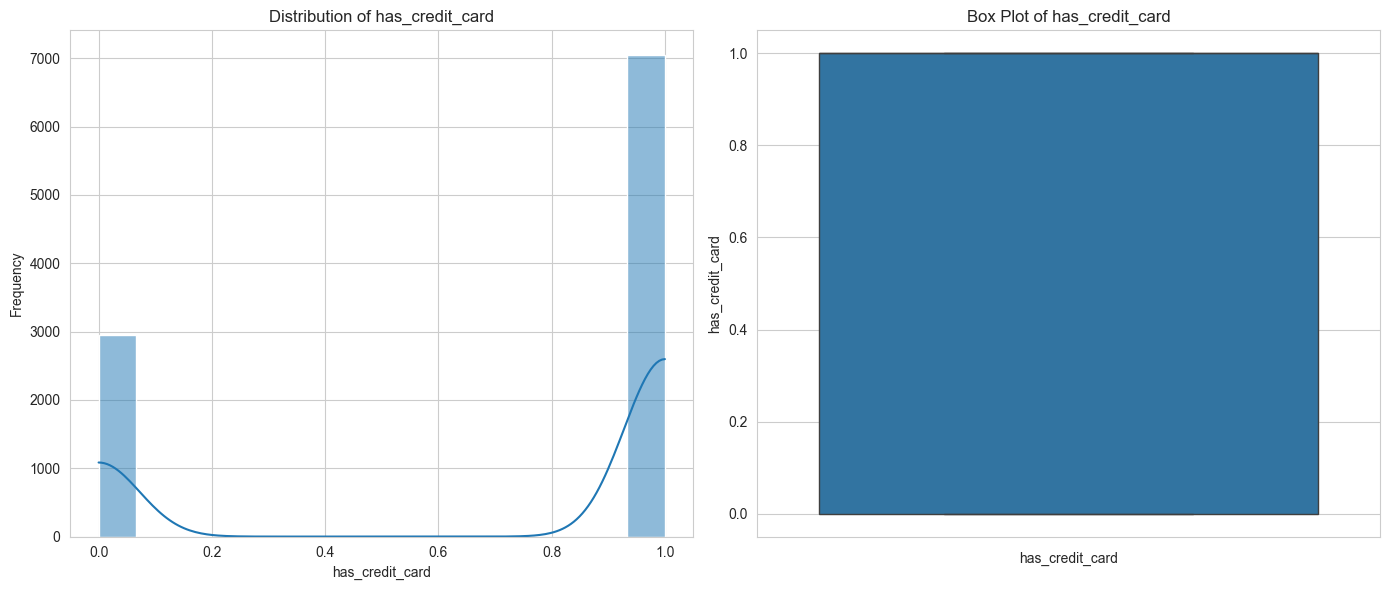

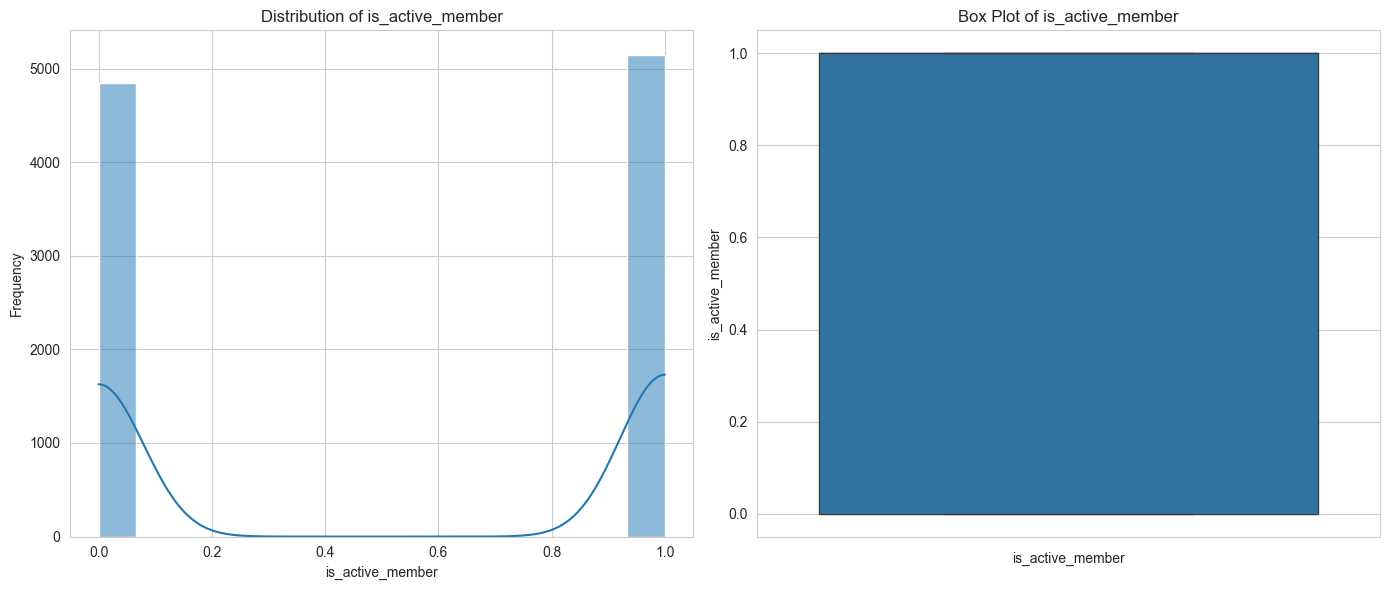

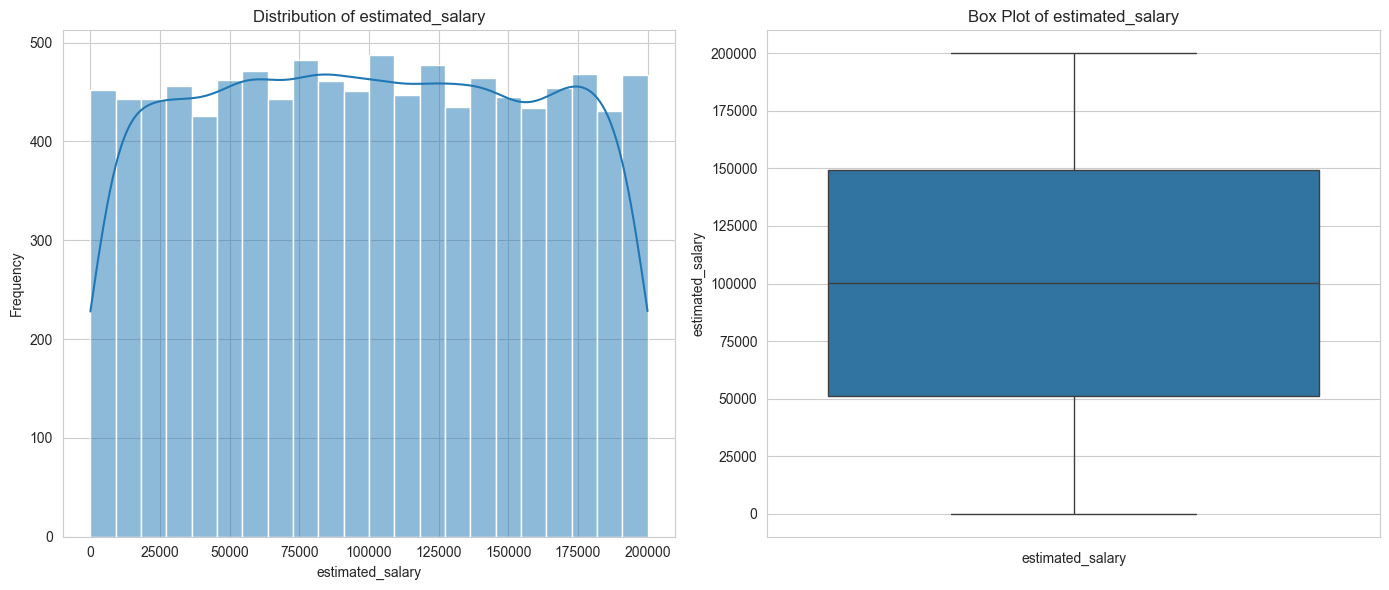

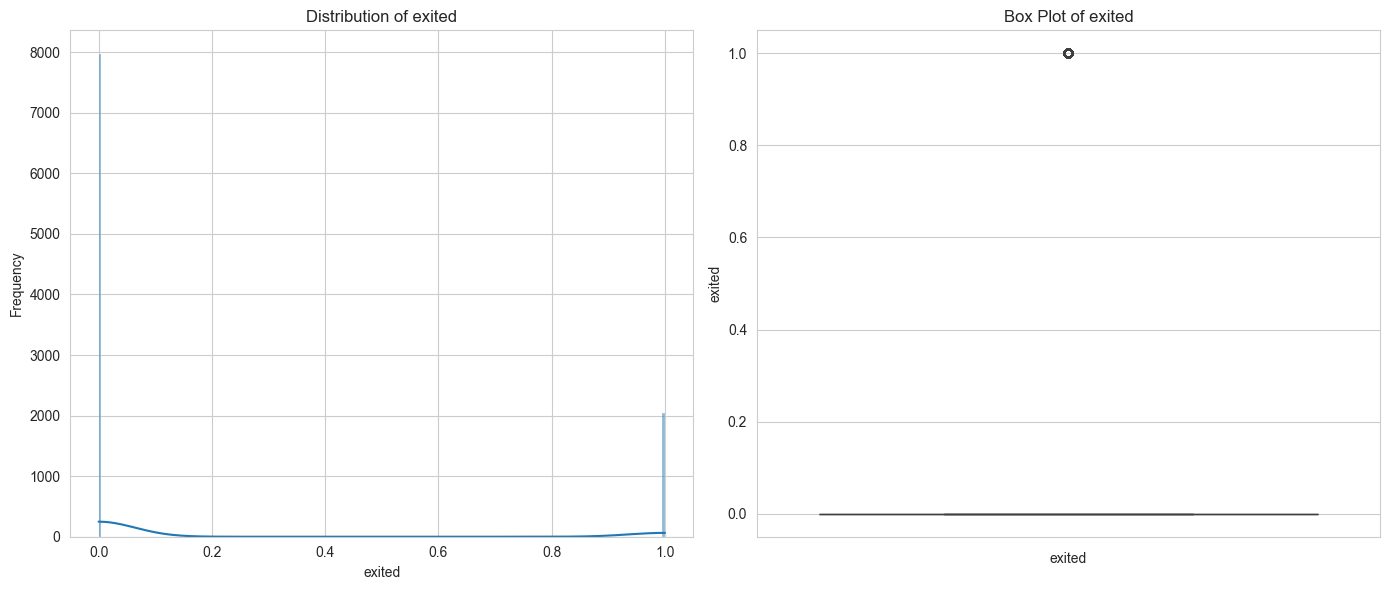

In [110]:
cols_to_viz = numeric_cols

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms and box plots for each feature
for column in cols_to_viz:
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

--

## Dropping Unneeded Columns

Dropping Columns that are not needed to help with the prediction model. Specifically, I will not need use:

* customer_id: column represents a unique identifier for each customer.

* row_number: this is just an index for each row

* surname: ext-based feature that is not directly useful for prediction. 

In [111]:
df.drop(columns=["customer_id", "row_number", "surname"], inplace=True)

--
## Saving Updated Clean Dataframe as CSV

Storing the cleaned dataframe for the next step of exploratory data analysis



In [112]:
# Get RAW csv data
CLEAN_DATA_PATH = os.environ.get("CLEAN_DATA_PATH")

df.to_csv(CLEAN_DATA_PATH, index=False)